Model training and testing source code

In the model development process, three ML models were selected for testing to achieve maximum accuracy. The three models are Linear Regression, Random Forest Regressor, and XGBoost. Among these models, Linear Regression exhibited the highest accuracy, making it the chosen model for the application. Additionally, several time-series analyses of stock data were presented using graphical representations.

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import yfinance as yf
import streamlit as st
from datetime import date

from sklearn.model_selection import train_test_split

%matplotlib inline

In [119]:
START = '2020-01-01'
TODAY = date.today().strftime("%Y-%m-%d")

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

data = load_data('BBCA.JK')
data.set_index(data.columns[0], inplace=True)
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,6695.0,6780.0,6680.0,6690.0,6029.958008,49445000
2020-01-03,6750.0,6800.0,6725.0,6800.0,6129.105469,47755500
2020-01-06,6720.0,6750.0,6690.0,6735.0,6070.517578,27300000
2020-01-07,6735.0,6770.0,6730.0,6740.0,6075.024414,45022500
2020-01-08,6670.0,6745.0,6670.0,6680.0,6020.944336,53692500
...,...,...,...,...,...,...
2024-07-15,10050.0,10075.0,9950.0,10050.0,10050.000000,36682600
2024-07-16,9975.0,10025.0,9950.0,9950.0,9950.000000,37192700
2024-07-17,9900.0,9950.0,9800.0,9800.0,9800.000000,90666000


In [120]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [121]:
data.drop(['Adj Close'], axis=1, inplace=True)

Exploratorial Data Analysis (EDA). Mostly EDA features several time-series analysis. This includes open-high, open-low, open-close, high-low and correlation plot between features

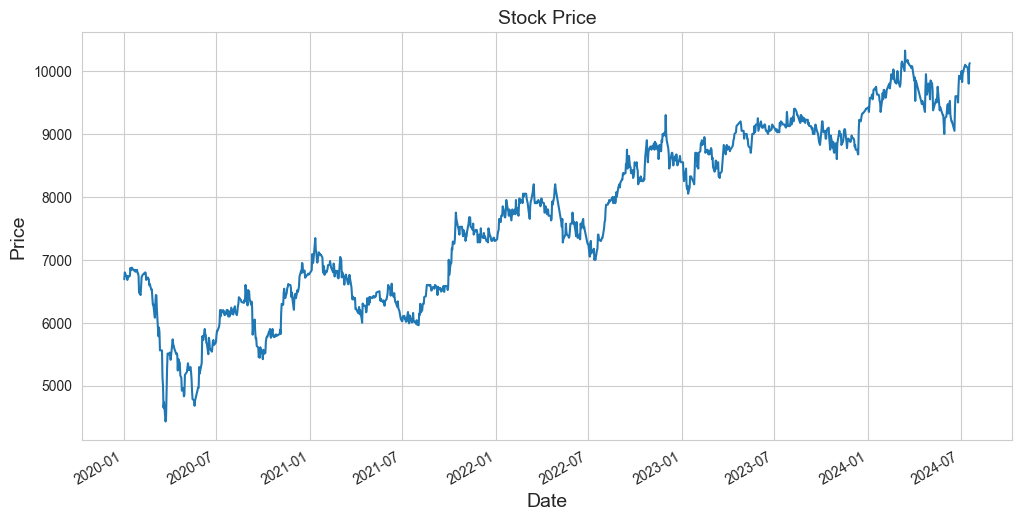

In [122]:
data['Close'].plot(figsize=(12, 6))
plt.title("Stock Price", fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.show()

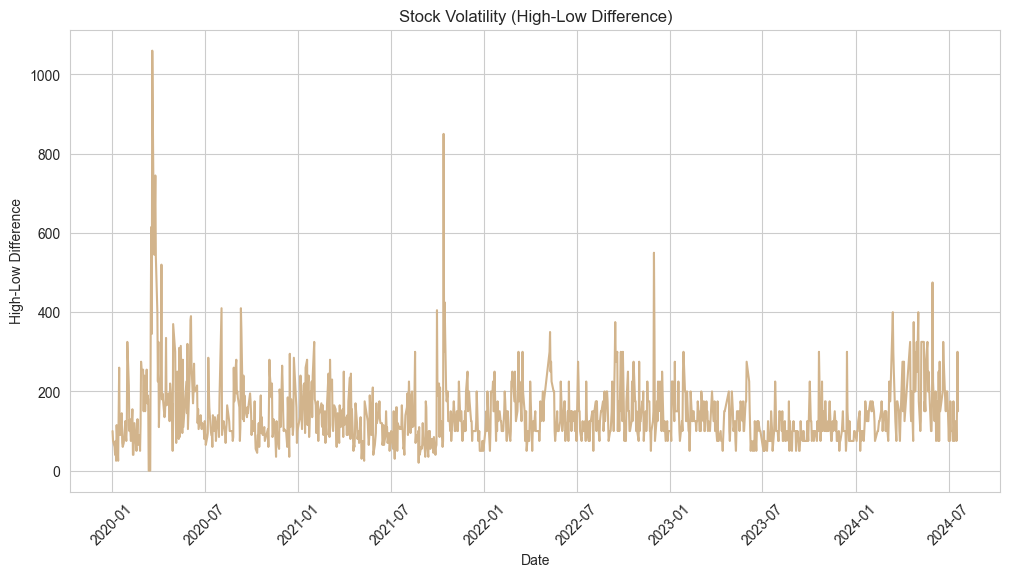

In [123]:
import pandas as pd
import matplotlib.pyplot as plt

data.index = pd.to_datetime(data.index)

data['High_Low_Diff'] = data['High'] - data['Low']

plt.figure(figsize=(12, 6))

plt.plot(data.index, data['High_Low_Diff'], label='High-Low Difference', color='tan')

plt.title('Stock Volatility (High-Low Difference)')
plt.xlabel('Date')
plt.ylabel('High-Low Difference')

plt.xticks(rotation=45)

plt.grid(True)
plt.show()

<Axes: xlabel='Date'>

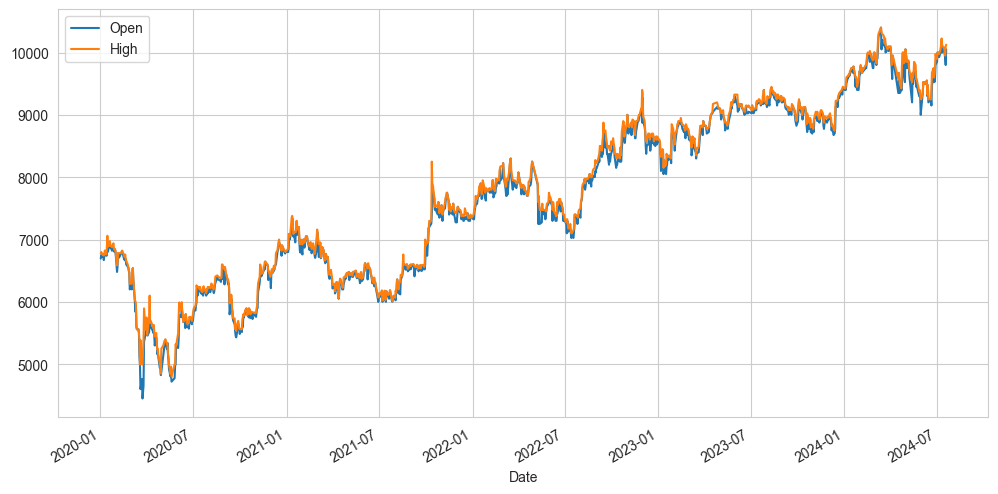

In [124]:
data[['Open','High']].plot(figsize = (12, 6), alpha = 1)

<Axes: xlabel='Date'>

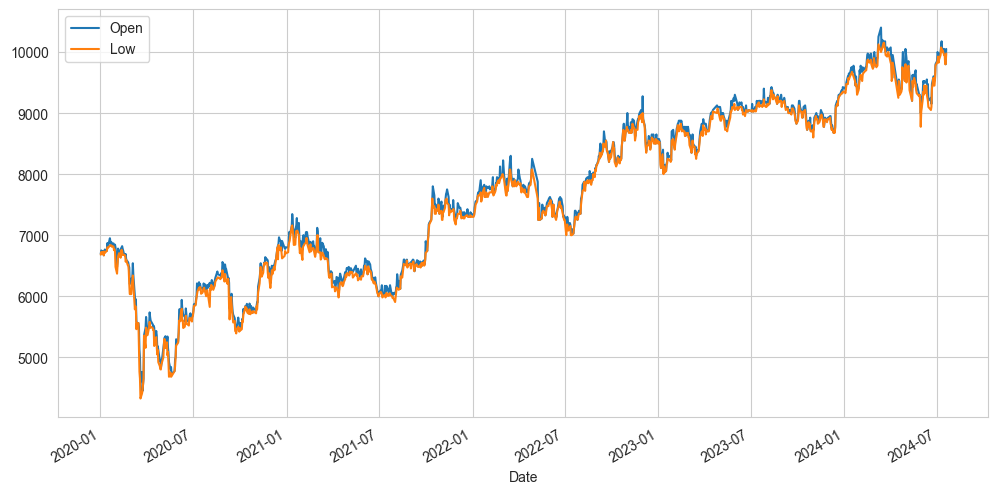

In [125]:
data[['Open','Low']].plot(figsize = (12, 6), alpha = 1)

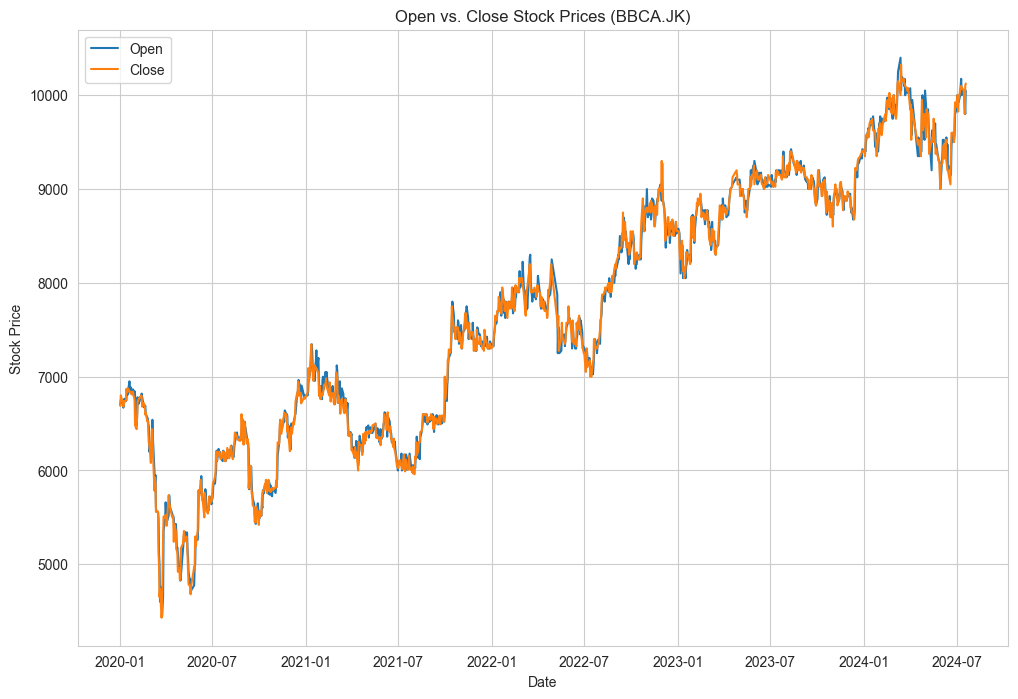

In [126]:
plt.figure(figsize=(12, 8))
sns.lineplot(x="Date", y="Open", data=data, label="Open")  
sns.lineplot(x="Date", y="Close", data=data, label="Close")  
plt.xlabel("Date")  
plt.ylabel("Stock Price")  
plt.title("Open vs. Close Stock Prices (BBCA.JK)") 
plt.legend()  
plt.show()

<Axes: xlabel='Date'>

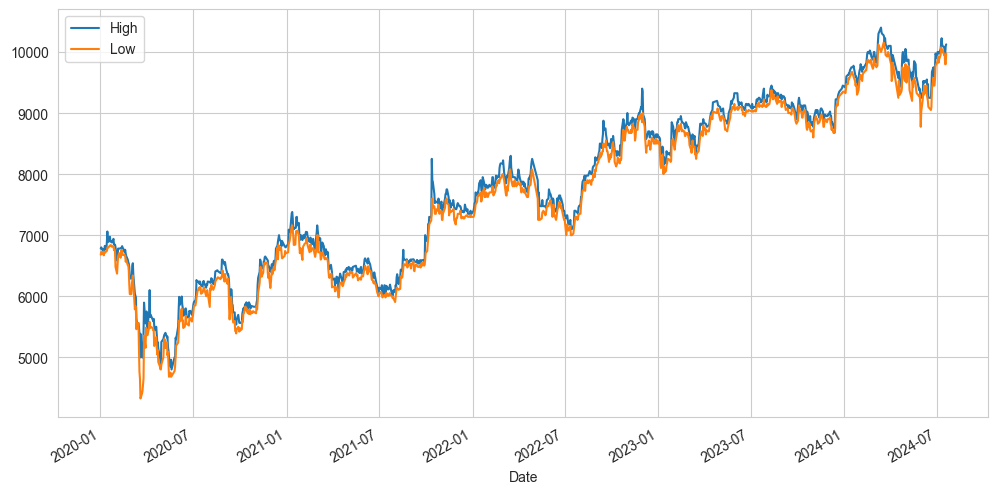

In [153]:
data[['High','Low']].plot(figsize = (12, 6), alpha = 1)

<Axes: >

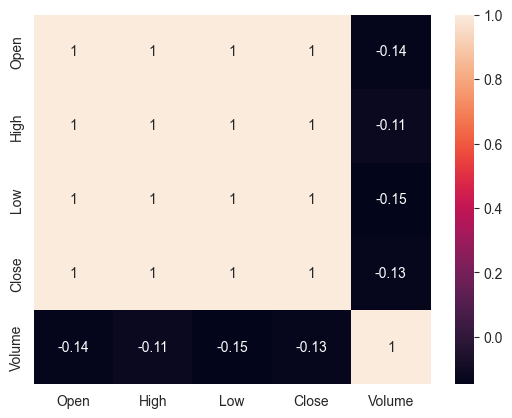

In [127]:
sns.heatmap(data[['Open', 'High', 'Low', 'Close', 'Volume']].corr(), annot = True)

Preprocessing Data

In [128]:
data.drop(columns = ['Volume'], inplace = True)

In [129]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'High_Low_Diff'], dtype='object')

In [130]:
data.isnull().sum()

Open             0
High             0
Low              0
Close            0
High_Low_Diff    0
dtype: int64

In [131]:
data.shape

(1099, 5)

In [132]:
data.describe()

,Open,High,Low,Close,High_Low_Diff
count,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000
mean,7674.781620,7744.877161,7601.642402,7671.992721,143.234759
std,1356.311865,1354.527155,1361.860622,1360.081809,85.607097
min,4450.000000,4800.000000,4325.000000,4430.000000,0.000000
25%,6505.000000,6562.500000,6427.500000,6500.000000,100.000000
50%,7625.000000,7700.000000,7575.000000,7650.000000,125.000000
75%,8900.000000,8950.000000,8837.500000,8900.000000,175.000000
max,10400.000000,10400.000000,10150.000000,10325.000000,1060.000000


Data splitting 70 : 30 (Train 70% | Testing 30%). Instead using train_test build-in function, I decide to create own split method to avoid random shuffling in data splitting

In [133]:
def create_train_test_set(data):
    
    features = data.drop(columns=['Close'], axis=1)
    target = data['Close']
    

    data_len = data.shape[0]
    print("Stock Data length: ",str(data_len))

    train_size = int(data_len * 0.7)
    print("Training Set length: ",str(train_size))

    test_size = int(data_len * 0.3)
    test_index = train_size + test_size
    print("Test Set length: ",str(test_size))

    X_train, X_test = features[:train_size], features[train_size:test_index]
    y_train, y_test = target[:train_size], target[train_size:test_index]

    print(X_train.shape, X_test.shape)
    print(y_train.shape, y_test.shape)
    
    return X_train, X_test, y_train, y_test

In [134]:
X_train, X_test, y_train, y_test = create_train_test_set(data)

Stock Data length:  1099
Training Set length:  769
Test Set length:  329
(769, 4) (329, 4)
(769,) (329,)


Each ML model developed has these four step
1. Build and train-test model
2. Make evaluation metrics
3. Create new dataframe from model test resuls
4. Visualize actual-predicted data)

Model Linear Regression 

In [135]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [136]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [137]:
print('R2_score:', r2_score(y_test, y_pred) * 100)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error::', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error(RMSE):', np.sqrt(mean_squared_error(y_test, y_pred)))

R2_score: 98.73771025593231
Mean Absolute Error: 39.61919567869019
Mean Squared Error:: 2333.925672487784
Root Mean Squared Error(RMSE): 48.310720057641284


In [138]:
errors = abs(y_pred - y_test)

print('Mean Absolute Error using Linear Regression:', round(np.mean(errors), 2), 'degrees')
mape = 100 * (errors / y_test)
accuracyRF = 100 - np.mean(mape)
print('Accuracy Random Forest:', round(accuracyRF, 2), '%.')

Mean Absolute Error using Linear Regression: 39.62 degrees
Accuracy Random Forest: 99.57 %.


In [139]:
df_pred = pd.DataFrame(y_test.values, columns=['Actual'], index=y_test.index)
df_pred['Predicted'] = y_pred
df_pred = df_pred.reset_index()
df_pred.loc[:, 'Date'] = pd.to_datetime(df_pred['Date'],format='%Y-%m-%d')
df_pred

,Date,Actual,Predicted
0,2023-02-20,8750.0,8781.007232
1,2023-02-21,8700.0,8744.256879
2,2023-02-22,8675.0,8684.185443
3,2023-02-23,8725.0,8716.950936
4,2023-02-24,8675.0,8753.062411
...,...,...,...
324,2024-07-12,10075.0,10075.807420
325,2024-07-15,10050.0,9997.877181
326,2024-07-16,9950.0,10000.829293
327,2024-07-17,9800.0,9862.827619


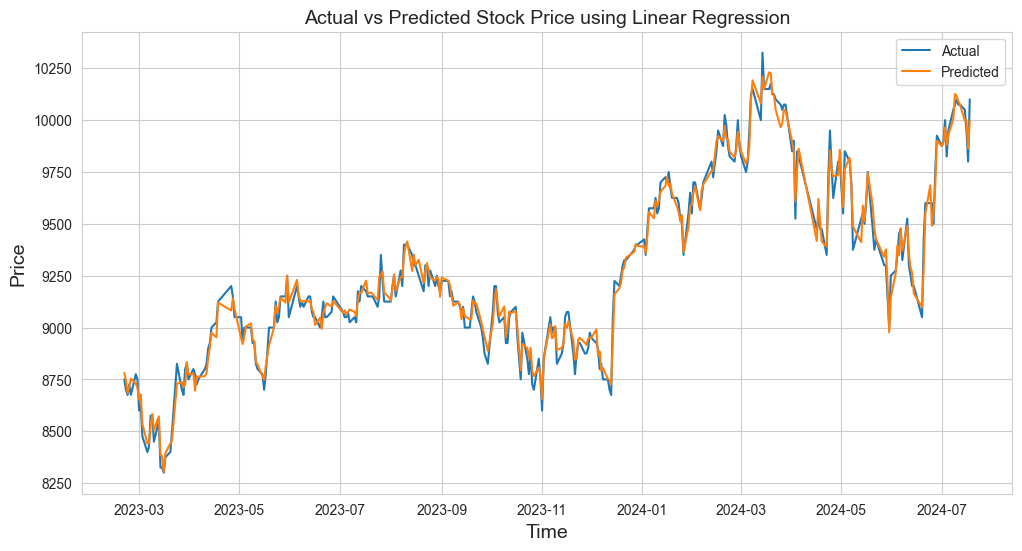

In [140]:
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
plt.plot(df_pred['Date'], df_pred['Actual'], label='Actual')
plt.plot(df_pred['Date'], df_pred['Predicted'], label='Predicted')
plt.title('Actual vs Predicted Stock Price using Linear Regression', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc='best')
plt.show()

Model Random Forest (Ensemble Model)

In [141]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [142]:
Y_pred = regressor.predict(X_test)

In [143]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print('R2_score:', r2_score(y_test, Y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, Y_pred))
print('Mean Squared Error::', mean_squared_error(y_test, Y_pred))
print('Root Mean Squared Error(RMSE):', np.sqrt(mean_squared_error(y_test, Y_pred)))

R2_score: 0.017948245337348512
Mean Absolute Error: 292.7528518960775
Mean Squared Error:: 181577.63007190512
Root Mean Squared Error(RMSE): 426.1192674262748


In [144]:
errors = abs(Y_pred - y_test)

print('Mean Absolute Error using Random Forest:', round(np.mean(errors), 2), 'degrees')
mape = 100 * (errors / y_test)
accuracyRF = 100 - np.mean(mape)
print('Accuracy Random Forest:', round(accuracyRF, 2), '%.')

Mean Absolute Error using Random Forest: 292.75 degrees
Accuracy Random Forest: 96.97 %.


In [145]:
df_pred = pd.DataFrame(y_test.values, columns=['Actual'], index=y_test.index)
df_pred['Predicted'] = Y_pred
df_pred = df_pred.reset_index()
df_pred.loc[:, 'Date'] = pd.to_datetime(df_pred['Date'],format='%Y-%m-%d')
df_pred

,Date,Actual,Predicted
0,2023-02-20,8750.0,8794.241667
1,2023-02-21,8700.0,8764.479167
2,2023-02-22,8675.0,8693.700000
3,2023-02-23,8725.0,8700.800000
4,2023-02-24,8675.0,8767.175833
...,...,...,...
324,2024-07-12,10075.0,9087.075000
325,2024-07-15,10050.0,9091.625000
326,2024-07-16,9950.0,9087.075000
327,2024-07-17,9800.0,9090.575000


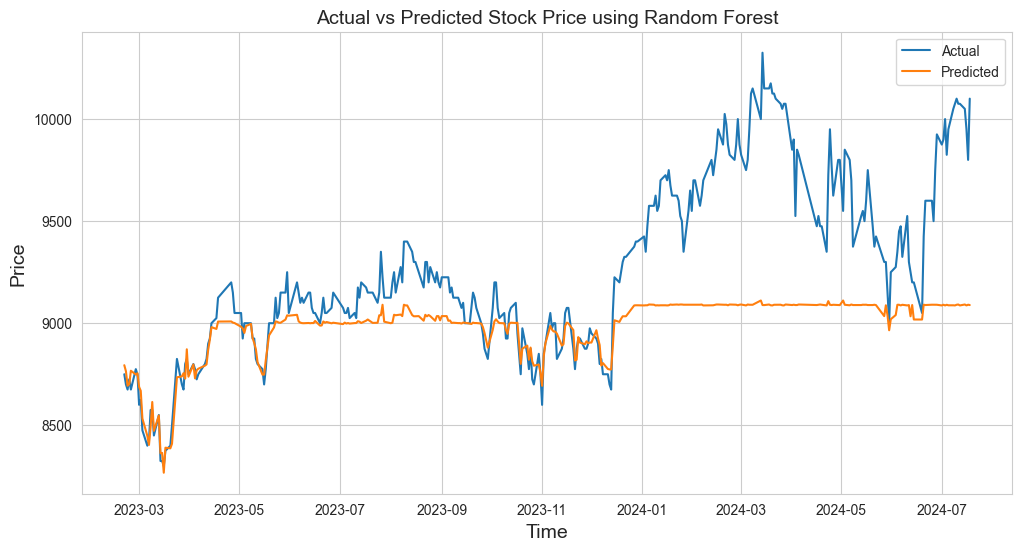

In [146]:
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
plt.plot(df_pred['Date'], df_pred['Actual'], label='Actual')
plt.plot(df_pred['Date'], df_pred['Predicted'], label='Predicted')
plt.title('Actual vs Predicted Stock Price using Random Forest', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc='best')
plt.show()

Model XGBoost

In [147]:
from xgboost import XGBRegressor

model = XGBRegressor(objective="reg:squarederror", n_estimators=1000)

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [148]:
prediction = model.predict(X_test)

In [149]:
print('R2_score:', r2_score(y_test, prediction))
print('Mean Absolute Error:', mean_absolute_error(y_test, prediction))
print('Mean Squared Error::', mean_squared_error(y_test, prediction))
print('Root Mean Squared Error(RMSE):', np.sqrt(mean_squared_error(y_test, prediction)))

R2_score: 0.3068078417883031
Mean Absolute Error: 246.47010650170972
Mean Squared Error:: 128168.59058079531
Root Mean Squared Error(RMSE): 358.00641136828165


In [150]:
errors = abs(prediction - y_test)

print('Mean Absolute Error using XgBoost:', round(np.mean(errors), 2), 'degrees.')

mape = 100 * (errors / y_test)

accuracyXGB = 100 - np.mean(mape)
print('Accuracy XGBoost:', round(accuracyXGB, 2), '%.')

Mean Absolute Error using XgBoost: 246.47 degrees.
Accuracy XGBoost: 97.45 %.


In [151]:
df_pred = pd.DataFrame(y_test.values, columns=['Actual'], index=y_test.index)
df_pred['Predicted'] = prediction
df_pred = df_pred.reset_index()
df_pred.loc[:, 'Date'] = pd.to_datetime(df_pred['Date'],format='%Y-%m-%d')
df_pred

,Date,Actual,Predicted
0,2023-02-20,8750.0,8800.205078
1,2023-02-21,8700.0,8768.793945
2,2023-02-22,8675.0,8686.368164
3,2023-02-23,8725.0,8723.781250
4,2023-02-24,8675.0,8761.342773
...,...,...,...
324,2024-07-12,10075.0,9234.968750
325,2024-07-15,10050.0,9236.296875
326,2024-07-16,9950.0,9234.968750
327,2024-07-17,9800.0,9205.116211


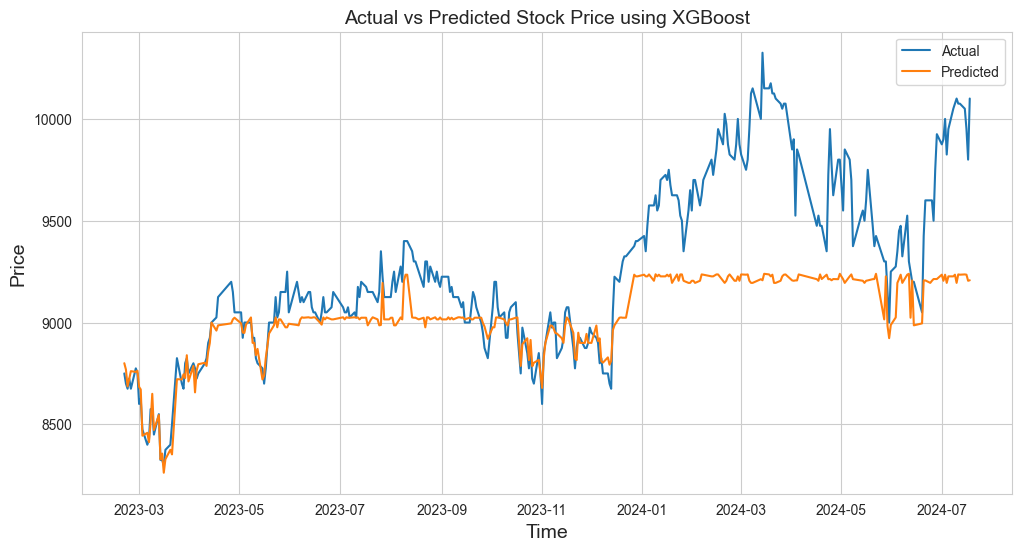

In [152]:
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
plt.plot(df_pred['Date'], df_pred['Actual'], label='Actual')
plt.plot(df_pred['Date'], df_pred['Predicted'], label='Predicted')
plt.title('Actual vs Predicted Stock Price using XGBoost', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.legend(loc='best')
plt.show()